<a href="https://colab.research.google.com/github/faruq2021/My-ML-MODEL-NOTEBOOKS/blob/main/TensorFlow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf 
import logging 
logger=tf.get_logger()
logger.setLevel(logging.ERROR)


In [2]:
celsius_q=np.array([-40,-10,0,8,15,22,38],dtype=float)
fahrenheit_a=np.array([-40,14,32,46,59,72,100], dtype=float)
for i,c in enumerate(celsius_q):
  print("{} degress Celsius={} degrees Fahrenheit".format(c,fahrenheit_a[i]))

-40.0 degress Celsius=-40.0 degrees Fahrenheit
-10.0 degress Celsius=14.0 degrees Fahrenheit
0.0 degress Celsius=32.0 degrees Fahrenheit
8.0 degress Celsius=46.0 degrees Fahrenheit
15.0 degress Celsius=59.0 degrees Fahrenheit
22.0 degress Celsius=72.0 degrees Fahrenheit
38.0 degress Celsius=100.0 degrees Fahrenheit


Build a model to carry out the above using tensorflow kera.

In [3]:
#Defining layers
l0=tf.keras.layers.Dense(units=1,input_shape=[1])

In [4]:
#once layers are defined, assemble them into a model
model=tf.keras.Sequential([l0])

#often times the layer will be defined inside the model definition
#e.g model=tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])

In [5]:
#Next compile the model 
#loss function is used how far off the prediction are from the desired outcome 
#optimizer function a way of reducing internal function to reduce loss

model.compile(loss="mean_squared_error",optimizer=tf.keras.optimizers.Adam(0.1))
#0.1 above is refered to as the learning rate, usually within 0.001 the default to 0.1

In [6]:
#train the model by calling the fit model 
history=model.fit(celsius_q,fahrenheit_a,epochs=500,verbose=False)
print("finished training your model")


finished training your model


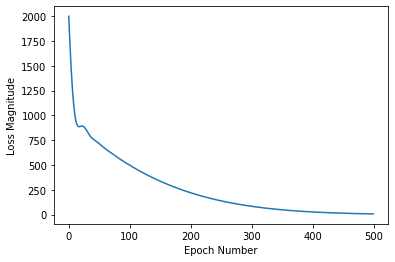

In [7]:
#Display training statistics 
#the fit mthod returns a history object. We can use this to plot how the loss of our 
#model goes down after training epoch. A high loss means that the fahrenheit degrees
#the model predicts is far from the correspondng value of fahrenheit-a
#Use Matplotlib to visulaize this(other tools can be used)

import matplotlib.pyplot as plt

plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])



In [8]:
print(model.predict([100.0]))

[[211.33252]]


In [9]:
#print the internal variables
print("these are the layer variables:{}".format(l0.get_weights()))

these are the layer variables:[array([[1.8213745]], dtype=float32), array([29.195066], dtype=float32)]


In [10]:
"""
Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?
"""
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74742]]
Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit
These are the l0 variables: [array([[0.09547262, 0.48989412, 0.18543145, 0.3790091 ]], dtype=float32), array([-2.3898964,  2.8238318, -2.2235887,  2.7752857], dtype=float32)]
These are the l1 variables: [array([[-0.32259873,  0.38871562, -0.30352637,  0.6737169 ],
       [ 1.0916805 , -0.3772347 ,  0.5829647 , -0.4680905 ],
       [-0.42335513, -0.6082061 , -0.28962013,  0.46233127],
       [ 0.9624466 ,  0.5042075 ,  0.24722452, -1.0906812 ]],
      dtype=float32), array([ 2.7767339,  0.5409786,  2.5009   , -2.7754638], dtype=float32)]
These are the l2 variables: [array([[ 1.2882886 ],
       [ 0.13154353],
       [ 0.7399278 ],
       [-1.1560069 ]], dtype=float32), array([2.7111032], dtype=float32)]


In [11]:
'''
Flattening: The process of converting a 2d image into 1d vector
ReLU: An activation function that allows a model to solve nonlinear problems
Softmax: A function that provides probabilities for each possible output class
Classification: A machine learning model used for distinguishing among two or more output categories
'''

'\nFlattening: The process of converting a 2d image into 1d vector\nReLU: An activation function that allows a model to solve nonlinear problems\nSoftmax: A function that provides probabilities for each possible output class\nClassification: A machine learning model used for distinguishing among two or more output categories\n'

In [12]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.7MB 20.4MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [13]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow_datasets as tfds
#tf.logging.set_verbosity(tf.logging.ERROR)
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm=tqdm.auto.tqdm

print(tf.__version__)


2.4.1


In [17]:
dataset, metadata=tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset=dataset['train'],dataset['test']

In [15]:
#create classnames 
classnames=["T-shirt/top","Trouser","Pullover","Dress","Coat",
            "sandal","Shirt","Sneaker","Bag","Ankle_boots"]

In [18]:
#explore and split the datasets
num_train_examples=metadata.splits["train"].num_examples
num_test_examples=metadata.splits["test"].num_examples
print("Number of training examples:{}".format(num_train_examples))
print("Number of test examples:{}".format(num_test_examples))

Number of training examples:60000
Number of test examples:10000


In [19]:
#preprocess the data by creating a normalization function
def normalize(images,labels):
  images=tf.cast(images,tf.float32)
  images/=255
  return images, labels

train_dataset=train_dataset.map(normalize)
train_dataset=test_dataset.map(normalize)

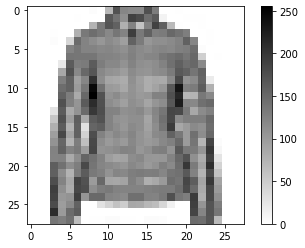

In [20]:
#explore the processed data,plot an image to see what it looks like 
#take a single image, and remove the colour dimension by reshaping

for image,label in test_dataset.take(1):
  break
image=image.numpy().reshape((28,28))

#plot the image 
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show>

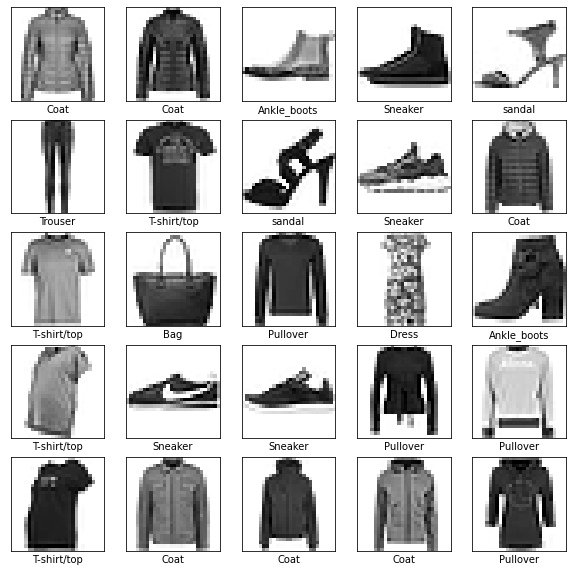

In [23]:
#plot the first s5 images as done to one above

plt.figure(figsize=(10,10))
i=0
for (image,label)in test_dataset.take(25):
  image=image.numpy().reshape(28,28)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(classnames[label])
  i += 1
plt.show

In [26]:
#build the neural network
#set up the layers of the NN, which is the basic building block of neural network
model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)), tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
                          


In [29]:
#compile the model using the adam optimizer
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [30]:
#before training datasets specify some iterative parameters to the datasets
BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

#fit model

model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6383 - accuracy: 0.7758
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3485 - accuracy: 0.8719
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2650 - accuracy: 0.9015
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2114 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1636 - accuracy: 0.9397


In [31]:
#EVALUATE accuracy 
test_loss, test_accuracy= model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("Accuracy on test dataset:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 34.0556 - accuracy: 0.9140
Accuracy on test dataset: 0.9139999747276306


In [32]:
#make predictions and explore
for test_images, test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_images)

In [34]:
predictions.shape

(32, 10)

In [36]:
predictions[0]


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
np.argmax(predictions[0])

4

In [38]:
test_labels[0]

4